In [44]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Importando os dados do Yahoo Finance

In [45]:
tickers = ['MGLU3.SA','PETR4.SA','AZUL4.SA','EMBR3.SA','IRBR3.SA']
startDate = '2020-01-01'    # format: aaaa/mm/dd/
endDate = '2020-12-31'                # format: aaaa/mm/dd/

myData = pd.DataFrame()
for t in tickers:
    myData[t] = wb.DataReader(t, data_source = 'yahoo', start = startDate, end = endDate)['Adj Close']

In [46]:
myData.info()
myData.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2020-01-02 to 2020-12-30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MGLU3.SA  247 non-null    float64
 1   PETR4.SA  247 non-null    float64
 2   AZUL4.SA  247 non-null    float64
 3   EMBR3.SA  247 non-null    float64
 4   IRBR3.SA  247 non-null    float64
dtypes: float64(5)
memory usage: 11.6 KB


,MGLU3.SA,PETR4.SA,AZUL4.SA,EMBR3.SA,IRBR3.SA
Date,,,,,
2020-01-02,12.038459,30.697725,58.799999,20.200001,35.231285
2020-01-03,11.931082,30.447742,56.759998,20.410000,34.957485
2020-01-06,11.940844,30.807716,55.000000,20.379999,34.630703
2020-01-07,11.906678,30.687725,56.820000,20.500000,34.860336
2020-01-08,12.272737,30.497738,56.919998,20.330000,34.992821


# Normalização

$\mathbf{\text{Normalização para base 100}}$
$$\frac{P_t}{P_0}*100$$<br>
Esse cálculo vai normalizar os valores para permitir uma comparação das ações partindo do mesmo valor normalizado (100%)

In [47]:
first = myData.iloc[0] # Encontrando os primeiros valores para cada ticker

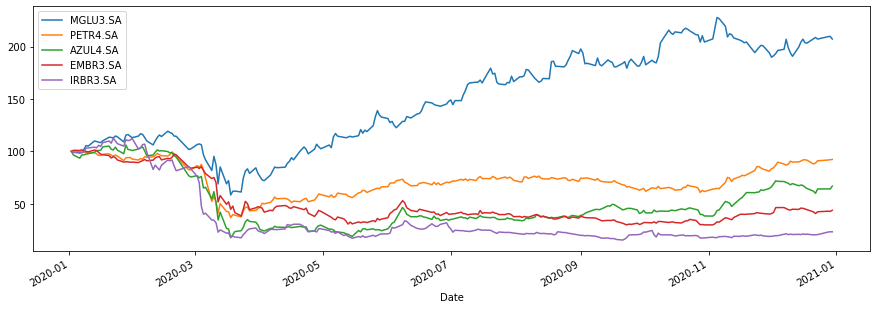

In [49]:
myDataNorm = (myData/first)*100
myDataNorm.plot(figsize=(15,5))
plt.show()

Nessa análise simplificada, entre as 5 empresas comparadas e em termos de rendimentos no valor de fechamento ajustado (coluna 'Adj Close'), a MGLU3.SA é a ação vencedora por conseguir crescimentos maiores que as outras 4 empresas.

# Retorno de um portfólio

A ideia é calcular o retorno de uma carteira com várias ações.<br>
Sendo $a_i$ cada ação na carteira e $r_i$ o rendimento no tempo $t$ da ação $a_i$, tem-se então:
$$r_{carteira} = \sum_{i=1}^{N} t_i*a_i$$

In [80]:
retornos = (myData/myData.shift(1))-1
retornosAnuais = retornos.mean()*250
retornos.head()

,MGLU3.SA,PETR4.SA,AZUL4.SA,EMBR3.SA,IRBR3.SA
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.008920,-0.008143,-0.034694,0.010396,-0.007771
2020-01-06,0.000818,0.011823,-0.031008,-0.001470,-0.009348
2020-01-07,-0.002861,-0.003895,0.033091,0.005888,0.006631
2020-01-08,0.030744,-0.006191,0.001760,-0.008293,0.003800


In [82]:
pesos1 = np.array([0.4, 0.2, 0.2, 0.15, 0.05])
carteira1 = str(round(np.dot(retornosAnuais, pesos1),5)*100) + ' %'
print('Carteira 1 = '+ carteira1)

Carteira 1 = 35.524 %


In [83]:
pesos2 = np.array([0.05, 0.2, 0.2, 0.3, 0.25])
carteira2 = str(round(np.dot(retornosAnuais, pesos2),5)*100) + ' %'
print('Carteira 2 = '+ carteira2)

Carteira 2 = -25.318 %
